In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy.interpolate import make_interp_spline
rcParams.update({'font.size': 16})
# TUDelft colors palette
colors = ["#0C2340","#00B8C8","#0076C2","#6F1D77","#EF60A3","#A50034","#E03C31","#EC6842","#FFB81C","#6CC24A","#009B77"]

In [191]:
print(np.log(x)/np.log(1000))

print(y)

[0.         0.33333333 0.56632333 0.66666667 0.89965667 1.        ]
[1.00100000e-04 6.67666667e-05 4.34676665e-05 3.34333333e-05
 1.01343332e-05 1.00000000e-07]


(1e-07, 0.001)

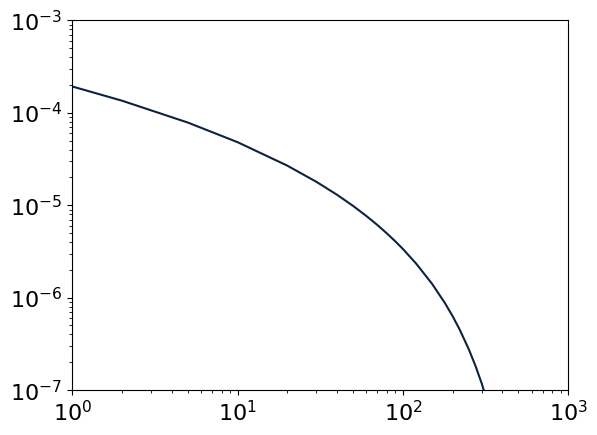

In [285]:
right = 500
top = .5e-5

u = np.array([1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 150, 180, 200, 220, 250, 275, 300, 350, 400, 450, 475])
v = 1e-8 + top*(np.log(right) - np.log(u))**3/np.log(right)

fig, ax = plt.subplots()
ax.loglog(u, v, color=colors[0], label="Ellipse")
ax.set_xlim(1, 1000)
ax.set_ylim(1e-7, 1e-3)

In [340]:
right = 500
top = .5e-5

u = np.array([1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 150, 180, 200, 220, 250, 275, 300, 350, 400, 450, 475])
v = 1e-8 + top*(np.log(right) - np.log(u))**3/np.log(right)

# fig, ax = plt.subplots()
# ax.loglog(u, v, color=colors[0], label="Ellipse")
# ax.set_xlim(1, 1000)
# ax.set_ylim(1e-7, 1e-3)

C = 10**-3
alpha = 2

limit_line_N = np.array([1, 1000])
limit_line_P = C/limit_line_N**alpha

N = np.array([1, 7, 20, 40, 60, 100, 160, 200, 300])
N_pmf = np.array([0.9999,
                  0.00004,
                  0.00003,
                  0.00002,
                  0.00000602,
                  0.000002,
                  0.000001,
                  0.00000092,
                  0.00000091])
N_cdf = np.cumsum(N_pmf)
N_exc = 1 - N_cdf
print(N_exc)

[ 1.00e-04  6.00e-05  3.00e-05  1.00e-05  3.98e-06  1.98e-06  9.80e-07
  6.00e-08 -8.50e-07]


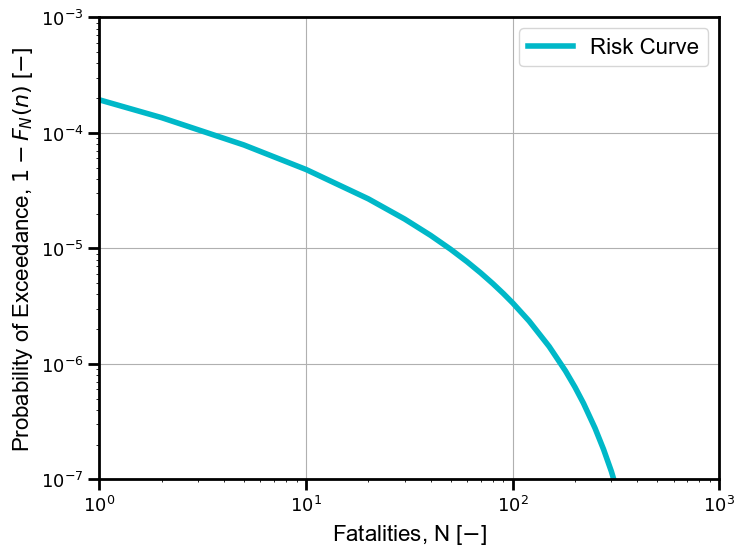

In [341]:
# -----------------------------------------------------------------
plot_title                  = ""
font                        = "Arial"
x_label                     = "Fatalities, N [$-$]"
y_label                     = "Probability of Exceedance, $1-F_N(n)$ [$-$]"
legend                      = True
grid                        = True
save_svg                    = True
remove_ticks                = False
remove_ticks_labels         = False
file_name                   = "../book/figures/fn_simple01"
# -----------------------------------------------------------------

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot() # axes_class=AxesZero)
ax.set_title(plot_title, fontfamily=font)
ax.set_xlabel(x_label, fontfamily=font)
ax.set_ylabel(y_label, fontfamily=font)

plt.setp(ax.spines.values(), linewidth=2)

# Visualize

# plotting
# ax.plot(limit_line_N, limit_line_P, '--', label='Limit Line', color=colors[0], linewidth=4)
ax.plot(u, v, label='Risk Curve', color=colors[1], linewidth=4)

# ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
# ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(1, 1000)
ax.set_ylim(10**(-7),.001)
# ax.set_yticks([10**(-7),10**(-5),10**(-3),10**(-1)])

ax.tick_params(axis='x', labelsize=13, width=2, length=8)
ax.tick_params(axis='y', labelsize=13, width=2, length=8)

if grid: ax.grid()
if legend: ax.legend(prop={"family":font})
if remove_ticks: ax.set_xticks([]); ax.set_yticks([])
if remove_ticks_labels: ax.set_xticklabels([]); ax.set_yticklabels([])
if save_svg: plt.savefig(file_name + '.svg')

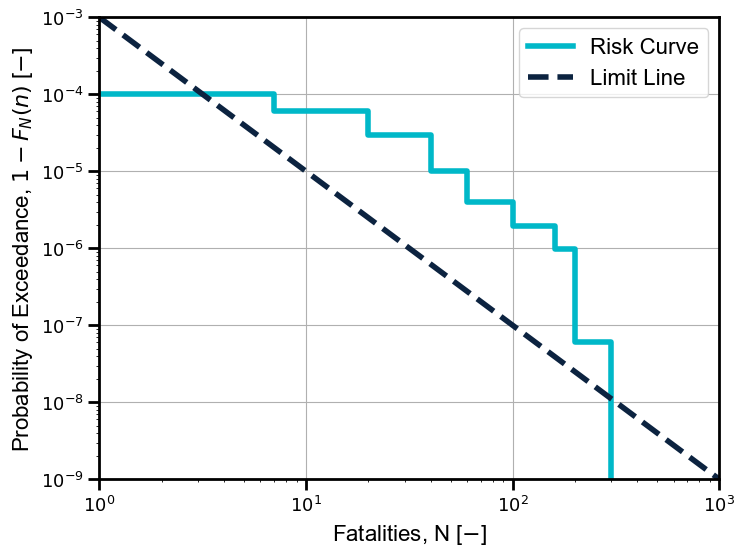

In [343]:
# -----------------------------------------------------------------
plot_title                  = ""
font                        = "Arial"
x_label                     = "Fatalities, N [$-$]"
y_label                     = "Probability of Exceedance, $1-F_N(n)$ [$-$]"
legend                      = True
grid                        = True
save_svg                    = True
remove_ticks                = False
remove_ticks_labels         = False
file_name                   = "../book/figures/fn_limit01"
# -----------------------------------------------------------------

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot() # axes_class=AxesZero)
ax.set_title(plot_title, fontfamily=font)
ax.set_xlabel(x_label, fontfamily=font)
ax.set_ylabel(y_label, fontfamily=font)

plt.setp(ax.spines.values(), linewidth=2)
# ax.spines["left"].set_position(("data", 0))
# ax.spines["bottom"].set_position(("data", 0))
# ax.spines["top"].set_position(("data", 1))
# ax.spines["right"].set_position(("data", 100))

# not a permanent solution (removed the part below 0)
# ---> find a better way to auto set upper bound
# ax.spines.bottom.set_bounds(0, 100)
# ax.spines.left.set_bounds(0, 1.0)
# ax.spines.top.set_bounds(0, 100)
# ax.spines.right.set_bounds(0, 1.0)

# Visualize

# plotting
ax.step(N, N_exc, where='post', label='Risk Curve', color=colors[1], linewidth=4)
ax.plot(limit_line_N, limit_line_P, '--', label='Limit Line', color=colors[0], linewidth=4)
# ax.plot(u, v, label='Risk Curve 2', color=colors[2], linewidth=4)

# ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
# ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(1, 1000)
ax.set_ylim(10**(-9),.001)
# ax.set_yticks([10**(-7),10**(-5),10**(-3),10**(-1)])

ax.tick_params(axis='x', labelsize=13, width=2, length=8)
ax.tick_params(axis='y', labelsize=13, width=2, length=8)

if grid: ax.grid()
if legend: ax.legend(prop={"family":font})
if remove_ticks: ax.set_xticks([]); ax.set_yticks([])
if remove_ticks_labels: ax.set_xticklabels([]); ax.set_yticklabels([])
if save_svg: plt.savefig(file_name + '.svg')

In [350]:
limit_line_P

array([5.e-04, 1.e-06])

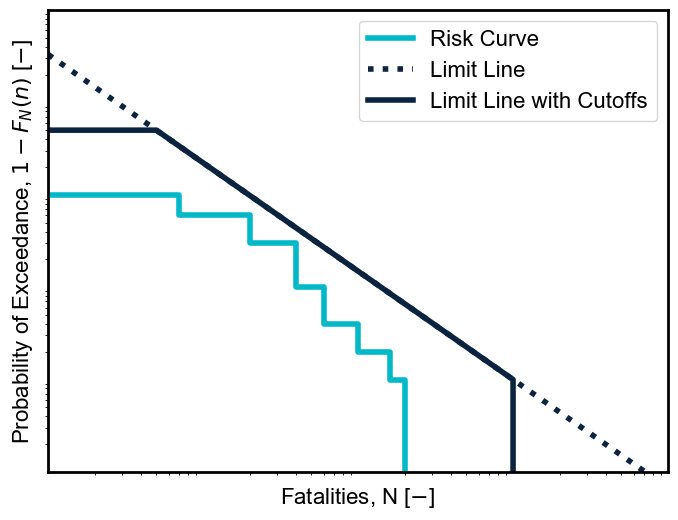

In [368]:
# -----------------------------------------------------------------
plot_title                  = ""
font                        = "Arial"
x_label                     = "Fatalities, N [$-$]"
y_label                     = "Probability of Exceedance, $1-F_N(n)$ [$-$]"
legend                      = True
grid                        = True
save_svg                    = True
remove_ticks                = True
remove_ticks_labels         = True
file_name                   = "../book/figures/fn_limit00"
# -----------------------------------------------------------------

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot() # axes_class=AxesZero)
ax.set_title(plot_title, fontfamily=font)
ax.set_xlabel(x_label, fontfamily=font)
ax.set_ylabel(y_label, fontfamily=font)

plt.setp(ax.spines.values(), linewidth=2)
# ax.spines["left"].set_position(("data", 0))
# ax.spines["bottom"].set_position(("data", 0))
# ax.spines["top"].set_position(("data", 1))
# ax.spines["right"].set_position(("data", 100))

# not a permanent solution (removed the part below 0)
# ---> find a better way to auto set upper bound
# ax.spines.bottom.set_bounds(0, 100)
# ax.spines.left.set_bounds(0, 1.0)
# ax.spines.top.set_bounds(0, 100)
# ax.spines.right.set_bounds(0, 1.0)

C = 0.003302
alpha = 1.173

limit_line_N = np.array([1, 10000])
limit_line_P = C/limit_line_N**alpha

limit_line_N_trim = [1, 5, 1000, 1000]
limit_line_P_trim = [5e-4, 5e-4, 1e-6, 1e-7]



# Visualize

# plotting
ax.step(N, N_exc, where='post', label='Risk Curve', color=colors[1], linewidth=4)
ax.plot(limit_line_N, limit_line_P, ':', label='Limit Line', color=colors[0], linewidth=4)
ax.plot(limit_line_N_trim, limit_line_P_trim, '-', label='Limit Line with Cutoffs', color=colors[0], linewidth=4)
# ax.plot(u, v, label='Risk Curve 2', color=colors[2], linewidth=4)

# ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
# ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)



ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(1, 10000)
ax.set_ylim(10**(-7),.01)

if grid: ax.grid()
if legend: ax.legend(prop={"family":font})
if remove_ticks: ax.set_xticks([]); ax.set_yticks([])
if remove_ticks_labels: ax.set_xticklabels([]); ax.set_yticklabels([])
if save_svg: plt.savefig(file_name + '.svg')